# Plot aggregate ribosome density around motifs

## Load libraries and define analysis-specific parameters

In [1]:
library(glue)
library(rtracklayer)
library(GenomicFeatures)
library(plyranges)
library(tidyverse)

theme_rasilab <- function() {
  theme_classic(base_family = "Helvetica", base_size = 6) +
    theme(
      strip.background = ggplot2::element_blank(),
      legend.text = element_text(size = 6),
      strip.text.x = element_text(size = 6),
    )
}

cbPalette <- c("#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")

theme_set(theme_rasilab())

ccds_annotations <- read_tsv("../data/gencode/gencode.v32.canonical_ccds.parameters.tsv.gz")
kk_type_motif_annotations <- read_tsv("../data/motif_counts/non_v_motifs.tsv.gz")

studies_analyzed = "han2020"
samples_analyzed = ""
cell_types_analyzed = "293"

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges


Attaching package: ‘IRanges’


The following object is masked from ‘package:glue’:

    trim


Loading required package: 

## Load sample annotations

In [2]:
sample_annotations <- read_tsv("../annotations/sra_annotations.tsv") %>%
  filter(str_detect(study, studies_analyzed)) %>%
  filter(str_detect(sample_name, samples_analyzed)) %>%
  filter(str_detect(cell_type, cell_types_analyzed)) %>%
  select(gsm, study, sample_name) %>%
  group_by(gsm) %>% 
  slice(1) %>% 
  ungroup() %>% 
  print()

Rows: 2 Columns: 27
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (18): srr, gsm, sample_name, gse, cell_type, study, study_subset, organi...
dbl  (1): pmid
lgl  (8): adapter, trim5, trim3, trim_condition, comment, sample_subset, his...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 2 × 3
  gsm        study   sample_name  
  <chr>      <chr>   <chr>        
1 GSM3907597 han2020 monosome_rep1
2 GSM3907598 han2020 monosome_rep2


## Load ribosome density around motifs in samples of interest

In [3]:
cvg <- '../data/non_v_type_density/' %>% 
  list.files(full.names = T, pattern = 'tsv.gz$')  %>%
  enframe("sno", "file") %>%
  mutate(gsm = str_extract(file, 'GSM[:digit:]+')) %>%
  right_join(sample_annotations, by = "gsm") %>%
  mutate(data = map(file, read_tsv)) %>%
  mutate(n_motifs = map_int(data, nrow)) %>%
  filter(n_motifs > 100) %>%
  select(-sno, -file) %>%
  unnest(data) %>%
  group_by(sample_name) %>%
  arrange(-cds_read_density) %>%
  mutate(y_order = 1:n()) %>%
  ungroup() %>%
  pivot_longer(`-50`:`50`, names_to = 'pos', values_to = 'read_count') %>%
  mutate(pos = as.integer(pos)) %>%
  filter(read_count >= 0) %>%
  mutate(read_density = read_count / cds_read_density) %>%
  mutate(motif_type = fct_rev(motif_type)) %>%
  print()

Rows: 4998 Columns: 111
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr   (5): gene_name, transcript_id, motif, motif_type, nt72
dbl (106): loc, strength, cds_read_density, cds_read_count, start, end, -50,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 5188 Columns: 111
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr   (5): gene_name, transcript_id, motif, motif_type, nt72
dbl (106): loc, strength, cds_read_density, cds_read_count, start, end, -50,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 1,017,250 × 19
   gsm        study   sample_name   gene_name transcript_id   loc motif strength
   <chr>      <chr>   <chr>         <chr>     <chr>         <dbl> <chr>    <dbl>
 1 GSM3907598 han2020 monosome_rep2 HIST1H1E  ENST00000304…   646 KAVK…       23
 2 GSM3907598 han2020 monosome_rep2 HIST1H1E  ENST00000304…   646 KAVK…       23
 3 GSM3907598 han2020 monosome_rep2 HIST1H1E  ENST00000304…   646 KAVK…       23
 4 GSM3907598 han2020 monosome_rep2 HIST1H1E  ENST00000304…   646 KAVK…       23
 5 GSM3907598 han2020 monosome_rep2 HIST1H1E  ENST00000304…   646 KAVK…       23
 6 GSM3907598 han2020 monosome_rep2 HIST1H1E  ENST00000304…   646 KAVK…       23
 7 GSM3907598 han2020 monosome_rep2 HIST1H1E  ENST00000304…   646 KAVK…       23
 8 GSM3907598 han2020 monosome_rep2 HIST1H1E  ENST00000304…   646 KAVK…       23
 9 GSM3907598 han2020 monosome_rep2 HIST1H1E  ENST00000304…   646 KAVK…       23
10 GSM3907598 han2020 monosome_rep2 HIST1H1E  ENST00000304…   646 KAVK…       23
#

## Plot position-average ribosome density across motifs of interest

`summarise()` has grouped output by 'motif_type'. You can override using the `.groups` argument.


# A tibble: 200 × 4
   motif_type   pos read_density     n
   <fct>      <int>        <dbl> <int>
 1 stall        -50        0.705  3748
 2 stall        -49        0.943  3748
 3 stall        -48        1.64   3748
 4 stall        -47        0.645  3748
 5 stall        -46        0.932  3750
 6 stall        -45        1.58   3750
 7 stall        -44        0.728  3750
 8 stall        -43        0.940  3752
 9 stall        -42        1.56   3752
10 stall        -41        0.673  3754
# … with 190 more rows


Warning message:
“Ignoring unknown parameters: linewidth”
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



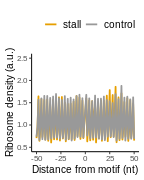

In [17]:
options(repr.plot.width = 1.2, repr.plot.height = 1.5)
plot_data <- cvg %>%
  group_by(transcript_id) %>% 
  mutate(has_vk_type_stall = if_else(max(strength) >= 9, T, F)) %>% 
  ungroup() %>% 
  filter(has_vk_type_stall) %>% 
  unite(sample_name, study, sample_name, sep=":") %>% 
  group_by(motif_type, pos) %>% 
  summarize(read_density = mean(read_density), n = dplyr::n()) %>% 
  ungroup() %>% 
  # filter(pos >= 22, pos <= 27) %>%
  print()

plot_data %>%
  ggplot(aes(x = pos, y = read_density, color = motif_type)) +
  # facet_wrap(~ sample_name, scales = "free_x") +
  geom_line(linewidth = 2) +
  scale_color_manual(values = c(cbPalette[c(2,1)])) +
  theme(legend.position = "top") +
  scale_y_continuous(breaks = c(0.5, 1.5, 2.5)) +
  ylim(0.5, 2.5)+
  labs(x = "Distance from motif (nt)", y = "Ribosome density (a.u.)", color = "") +
  theme(legend.position = "top", legend.key.width = unit(0.3, "cm")) +
  NULL

ggsave("../figures/non_v_type_ribosome_density.pdf", width = 1.2, height = 1.5)

## Calculate and plot aggregate motif density within a window

`summarise()` has grouped output by 'motif_type', 'y_order'. You can override using the `.groups` argument.


# A tibble: 7,555 × 4
   motif_type y_order transcript_id     read_density
   <fct>        <int> <chr>                    <dbl>
 1 stall            1 ENST00000304218.5        1.74 
 2 stall            3 ENST00000621411.2        0.745
 3 stall            4 ENST00000621411.2        0.812
 4 stall            6 ENST00000578186.2        0.679
 5 stall            7 ENST00000369163.3        0.959
 6 stall            8 ENST00000579512.2        0.643
 7 stall            9 ENST00000343677.3        1.52 
 8 stall           10 ENST00000579512.2        0.621
 9 stall           11 ENST00000369163.3        1.20 
10 stall           12 ENST00000343677.3        1.56 
# … with 7,545 more rows


Warning message:
“Transformation introduced infinite values in continuous y-axis”


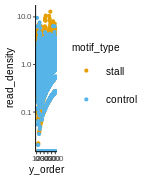

In [5]:
plot_data <- cvg %>%
  group_by(transcript_id) %>% 
  mutate(has_vk_type_stall = if_else(max(strength) >= 9, T, F)) %>% 
  ungroup() %>% 
  filter(has_vk_type_stall) %>% 
  filter(pos >= 20, pos <=30) %>% 
  group_by(motif_type, y_order, transcript_id) %>% 
  summarize(read_density = mean(read_density)) %>%
  ungroup() %>% 
  print()

plot_data %>% 
  ggplot(aes(x = y_order, y = read_density, color = motif_type)) +
  geom_point(size = 0.5) +
  scale_color_manual(values = cbPalette[c(2,3)]) +
  scale_y_log10()

## Same plot as above, but in Violin format

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 420 rows containing non-finite values (stat_ydensity).”
Saving 6.67 x 6.67 in image

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 420 rows containing non-finite values (stat_ydensity).”


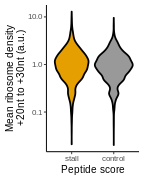

In [6]:
plot_data %>% 
  # ggplot(aes(x = motif_type, y = read_density, color = motif_type)) +
  ggplot(aes(x = motif_type, y = read_density, fill = motif_type)) +
  # geom_jitter(size = 0.5, height = 0) +
  geom_violin(color = "black") +
  # scale_color_manual(values = cbPalette[c(2,1)]) +
  scale_fill_manual(values = cbPalette[c(2,1)]) +
  guides(fill = F) +
  labs(x = "Peptide score", y = "Mean ribosome density\n+20nt to +30nt (a.u.)", color = "") +
  scale_y_log10()

ggsave(glue("../figures/mean_non_v_type_density_20to30_{studies_analyzed}.pdf"))

## Compare the control and stall motif densities for significant differences

In [7]:
plot_data %>% 
  nest() %>% 
  mutate(test = map(data, function(df) wilcox.test(read_density ~ motif_type, data = df, alternative = "greater"))) %>% 
  mutate(n = map_int(data, nrow)) %>% 
  mutate(test_results = map(test, broom::tidy)) %>% 
  select(-data, -test) %>% 
  unnest(test_results) %>% 
  print()

Warning message:
“`...` must not be empty for ungrouped data frames.
Did you want `data = everything()`?”


# A tibble: 1 × 5
      n statistic p.value method                                     alternative
  <int>     <dbl>   <dbl> <chr>                                      <chr>      
1  7555  7344886.  0.0133 Wilcoxon rank sum test with continuity co… greater    


## Tabulate aggregate coverage density 

In [8]:
cvg %>% 
  filter(pos >= 20, pos <=30) %>% 
  group_by(motif_type, transcript_id) %>% 
  summarize(motif_read_density = mean(read_density), cds_read_density = mean(cds_read_density)) %>%
  ungroup() %>% 
  # mutate(sample_name = str_extract(sample_name, '[:digit:]$')) %>% 
  # pivot_wider(names_from = sample_name, values_from = c(motif_read_density, cds_read_density)) %>%
  arrange(desc(motif_read_density)) %>%
  left_join(kk_type_motif_annotations, by = c("motif_type", "transcript_id")) %>%
  left_join(select(ccds_annotations, transcript_id, gene_name), by = "transcript_id") %>%
  # select(-transcript_id) %>%
  write_tsv("../tables/non_v_type_motifs_controls_han2020_plus20to30_mean_ribo_density.tsv.gz") %>%
  print()

`summarise()` has grouped output by 'motif_type'. You can override using the `.groups` argument.


# A tibble: 5,288 × 10
   motif_type transcript_id  motif_read_dens… cds_read_density gene_name.x   loc
   <chr>      <chr>                     <dbl>            <dbl> <chr>       <dbl>
 1 stall      ENST000003676…            11.7             0.494 VTA1          445
 2 stall      ENST000000550…             9.23            0.774 RFC2          397
 3 stall      ENST000003706…             8.74            0.495 RPF1          205
 4 stall      ENST000005619…             8.50            0.749 ARPP19        563
 5 stall      ENST000002956…             8.38            0.738 ARPC2        1044
 6 control    ENST000003546…             7.95           11.3   HNRNPA2B1     637
 7 stall      ENST000003328…             7.29            0.378 AEN           188
 8 control    ENST000002695…             7.24            2.18  PMAIP1        447
 9 stall      ENST000002803…             6.89            2.65  CCT5          829
10 stall      ENST000003125…             6.56            0.340 DRAP1         442
# … w